In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn. metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.externals import joblib
%matplotlib inline

#custom functions
def NSC(y_pred,y_true):
    """
    Nash-Sutcliffe Coefficient
    """
    return 1 - sum((y_pred-y_true)**2)/sum((y_true-np.mean(y_true))**2)

def corr(data1, data2):
    "data1 & data2 should be numpy arrays."
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()

#     corr = ((data1-mean1)*(data2-mean2)).mean()/(std1*std2)
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
#Load dataframes
dir_data = '../data/Features/'

Potohar_HR_Features = pd.read_excel(dir_data + 'Potohar_HR_Features.xlsx')
Potohar_HR_Features = Potohar_HR_Features.fillna(0)
Potohar_HR_Features.name ='Potohar_HR_Features'


In [3]:
#top 5  weekly
Season_Feb_Apr_Meanweekly_C=[
    'WK_13_Meanweekly_C','WK_14_Meanweekly_C','WK_15_Meanweekly_C','WK_16_Meanweekly_C',
    'WK_17_Meanweekly_C','WK_18_Meanweekly_C','WK_19_Meanweekly_C','WK_20_Meanweekly_C',
    'WK_21_Meanweekly_C','WK_22_Meanweekly_C','WK_23_Meanweekly_C','WK_24_Meanweekly_C',
]

Season_Jan_Apr_Meanweekly_C= [
     'WK_9_Meanweekly_C','WK_10_Meanweekly_C','WK_11_Meanweekly_C','WK_12_Meanweekly_C',
    'WK_13_Meanweekly_C','WK_14_Meanweekly_C','WK_15_Meanweekly_C','WK_16_Meanweekly_C',
    'WK_17_Meanweekly_C','WK_18_Meanweekly_C','WK_19_Meanweekly_C','WK_20_Meanweekly_C',
    'WK_21_Meanweekly_C','WK_22_Meanweekly_C','WK_23_Meanweekly_C','WK_24_Meanweekly_C',
]


Season_Nov_Mar_Minweekly_C =[
    'WK_1_Minweekly_C','WK_2_Minweekly_C','WK_3_Minweekly_C','WK_4_Minweekly_C',
    'WK_5_Minweekly_C','WK_6_Minweekly_C','WK_7_Minweekly_C','WK_8_Minweekly_C',
    'WK_9_Minweekly_C','WK_10_Minweekly_C','WK_11_Minweekly_C','WK_12_Minweekly_C',
    'WK_13_Minweekly_C','WK_14_Minweekly_C','WK_15_Minweekly_C','WK_16_Minweekly_C',
    'WK_17_Minweekly_C','WK_18_Minweekly_C','WK_19_Minweekly_C','WK_20_Minweekly_C',
]

March_SMtop5=[
    'Mar_Minmonthly_SM_40_100cm','Mar_Medianmonthly_SM_40_100cm','Mar_Meanmonthly_SM_10_40cm',
    'Mar_Medianmonthly_SM_10_40cm','Mar_Meanmonthly_SM_0_10cm'
]



In [4]:
#Combined Season Weekly and Monthly data
Season_Week_Month_top5 = [
    'WK_14_Minweekly_SM_0_10cm','WK_15_Minweekly_SM_0_10cm','WK_16_Minweekly_SM_0_10cm',
    'WK_21_Minweekly_SM_0_10cm','WK_10_Minweekly_SM_0_10cm','WK_13_Maxweekly_SM_0_10cm',
    'WK_14_Maxweekly_SM_0_10cm','WK_15_Maxweekly_SM_0_10cm','WK_9_Maxweekly_SM_0_10cm',
    'WK_20_Maxweekly_SM_0_10cm','WK_13_Minweekly_SM_0_10cm','WK_14_weekly_STemp_Hrsabove_10C',
    'WK_24_weekly_STemp_Hrsabove_10C','WK_16_weekly_STemp_Hrsabove_10C','WK_15_weekly_STemp_Hrsabove_10C',
    'WK_13_weekly_STemp_Hrsabove_10C','Feb_Minmonthly_SM_0_10cm','MaxMonth_Season_Precip_mm',
    'Feb_Medianmonthly_SM_10_40cm','Feb_Medianmonthly_SM_0_10cm','Jan_Maxmonthly_SM_10_40cm',
    'NovandMar_Precip_hours', 'Season_Summonthly_Precip_mm','Mean_Monthly_Precip_mm',
    'MaxMonth_Season_Precip_mm', 'Season_Precip_hours','MinMonth_Season_Precip_mm',
    'Jan_Maxmonthly_SM_10_40cm','Jan_Minmonthly_SM_10_40cm','Jan_Maxmonthly_SM_0_10cm',
    'Jan_Minmonthly_SM_0_10cm','Jan_monthly_Air_temp_Hrs15_20C'

]

Season_Week_Month_top3 = [
    'WK_14_Minweekly_SM_0_10cm','WK_15_Minweekly_SM_0_10cm','WK_16_Minweekly_SM_0_10cm',
    'WK_13_Maxweekly_SM_0_10cm','WK_14_Maxweekly_SM_0_10cm','WK_15_Maxweekly_SM_0_10cm',
    'WK_14_weekly_STemp_Hrsabove_10C','WK_24_weekly_STemp_Hrsabove_10C','WK_16_weekly_STemp_Hrsabove_10C',
    'Feb_Minmonthly_SM_0_10cm','MaxMonth_Season_Precip_mm','Feb_Medianmonthly_SM_10_40cm',
    'Season_Summonthly_Precip_mm','Mean_Monthly_Precip_mm','MaxMonth_Season_Precip_mm',
    'Jan_Maxmonthly_SM_10_40cm','Jan_Minmonthly_SM_10_40cm','Jan_Maxmonthly_SM_0_10cm'
]

Season_Week_Month_top2 = [
    'WK_14_Minweekly_SM_0_10cm','WK_15_Minweekly_SM_0_10cm','WK_13_Maxweekly_SM_0_10cm',
    'WK_14_Maxweekly_SM_0_10cm', 'WK_14_weekly_STemp_Hrsabove_10C','WK_24_weekly_STemp_Hrsabove_10C',
    'Feb_Minmonthly_SM_0_10cm','MaxMonth_Season_Precip_mm','Season_Summonthly_Precip_mm',
    'Mean_Monthly_Precip_mm', 'Jan_Maxmonthly_SM_10_40cm','Jan_Minmonthly_SM_10_40cm'
]


Season_Week_Month_top1 = [
    'WK_14_Minweekly_SM_0_10cm','WK_13_Maxweekly_SM_0_10cm','WK_14_weekly_STemp_Hrsabove_10C',
    'Feb_Minmonthly_SM_0_10cm', 'Season_Summonthly_Precip_mm','Jan_Maxmonthly_SM_10_40cm'
]

In [5]:
#Combined Season Weekly and Monthly data
Top_Features={
    'Season_Week_Month_top5':Season_Week_Month_top5, 
    'Season_Week_Month_top3':Season_Week_Month_top3,
    'Season_Week_Month_top2':Season_Week_Month_top2, 
    'Season_Week_Month_top1':Season_Week_Month_top1,
    'March_SMtop5':March_SMtop5,
    'Season_Feb_Apr_Meanweekly_C':Season_Feb_Apr_Meanweekly_C,
    'Season_Jan_Apr_Meanweekly_C':Season_Jan_Apr_Meanweekly_C,
    'Season_Nov_Mar_Minweekly_C':Season_Nov_Mar_Minweekly_C, 
}


top_features =[
    'Season_Week_Month_top5' ,'Season_Week_Month_top3','Season_Week_Month_top2' ,
    'Season_Week_Month_top1','March_SMtop5','Season_Feb_Apr_Meanweekly_C',
    'Season_Jan_Apr_Meanweekly_C','Season_Nov_Mar_Minweekly_C' 
]

In [6]:
  #Model classification as a function of target and data input
#This model designated to work only with Potohar Wheat Features!!!!!!!!!!!!!!!
def Direct_Out(features): 
    global dir_out
    global directory
    directory = '../output/RandomForest/PM_HR_Features'
   
    if features == Season_Week_Month_top5:
        dir_out = directory + '/Season_Week_Month_top5/'    
    elif features == Season_Week_Month_top3:
        dir_out = directory + '/Season_Week_Month_top3/'
    elif features ==Season_Week_Month_top2:
        dir_out = directory + '/Season_Week_Month_top2/'
    elif features == Season_Week_Month_top1:
        dir_out = directory + '/Season_Week_Month_top1/'
    elif features == March_SMtop5:
        dir_out = directory + '/March_SMtop5/'
    elif features == Season_Feb_Apr_Meanweekly_C:
        dir_out = directory + '/Season_Feb_Apr_Meanweekly_C/'   
    elif features == Season_Jan_Apr_Meanweekly_C:
        dir_out = directory + '/Season_Jan_Apr_Meanweekly_C/'  
    elif features ==Season_Nov_Mar_Minweekly_C:
        dir_out = directory + '/Season_Nov_Mar_Minweekly_C/'
        
    return (dir_out)


In [7]:
#make a model function to determine best parameters
#Xt, yt are training features, training targets
def fit_model(X_train, y_train):
  
  #model dictionary and hyper-params to search over
    model = {}
    model['RandomForestRegressor'] = [RandomForestRegressor(), {'n_estimators':np.arange(500,4000,200),
                                                                'criterion' : ['mse'],
                                                                'max_depth':np.arange(5,65,5),
                                                                'max_features': [0.25, 0.5, 0.75],
                                                                'bootstrap':['True'],
                                                                'oob_score':['False'],
                                                                'random_state':[42],
                                                                'n_jobs': [-1]
                                                                   }] 
  #Loop over models, hyper-params, and tune with cross validation                                                               
    for i in model.keys():
        clf = GridSearchCV(model[i][0], model[i][1], n_jobs = -1, cv = 5)
        GS = clf.fit(X_train,y_train)
        model[i].append(GS)
        clf_b = model[i][2].best_estimator_
  
    return clf_b

In [8]:
#create a dataframe to display the Statistics of model
Model_ResultsRFMonthlyFinalTop = pd.DataFrame()


#create a dataframe to display the Statistics of model
def stats(data,features,target, y_test, y_pred):
    Accuracy = pd.DataFrame()
    Accuracy['Dataframe'] = [data]
    Accuracy['Feature'] = [features]
    Accuracy['Target'] = [target]
    Accuracy['mean_absolute_error'] = [mean_absolute_error(y_test, y_pred)]
    Accuracy['RMSE'] = [np.sqrt(mean_squared_error(y_test, y_pred))] # compute the RMSE of predictions
    Accuracy['r^2'] = [r2_score(y_test, y_pred)]
    Accuracy['NS'] = [NSC(y_pred,y_test)]
    Accuracy['mean square error'] = [mean_squared_error(y_test, y_pred)]
    Accuracy['Correlation'] = [corr(y_pred, y_test)]
    return Accuracy

In [9]:
#Model classification as a function of target and data input
#This model designated to work only with Potohar Wheat Features!!!!!!!!!!!!!!!
def RFR_PM_HR_Norm_model(target, features, data):
    
    global dir_out
    global directory
    global Model_ResultsRFMonthlyFinalTop
    directory = '../output/RandomForest/PM_HR_Features'
    Resultsdirectory = '../output/RandomForest/'
    dir_out = Direct_Out(features)
    df = data
  
    X = df[features]
    y = df[target]
  
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =42)
  
    clf_best = fit_model(X_train,y_train)
  
    print (df.name)
    print(j)
    print (target)
    print (clf_best)
    
    #predict using the best model
    y_pred = clf_best.predict(X_test)
    feature_imp = pd.DataFrame(clf_best.feature_importances_.reshape(-1, len(clf_best.feature_importances_)), 
                           columns= features)
   #Statistics
   #Statistics
    RMSE= np.sqrt(mean_squared_error(y_test, y_pred)) # compute the RMSE of predictions
    r2= r2_score(y_test, y_pred)  
    MAE =  [mean_absolute_error(y_test, y_pred)]
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    NS = NSC(y_pred,y_test)
    Cor = corr(y_pred, y_test)
    Model_ResultsRFMonthlyFinalTop = Model_ResultsRFMonthlyFinalTop.append(stats('PM_HR_Features_Norm',j,target, y_test, y_pred))
    Model_ResultsRFMonthlyFinalTop.to_csv(Resultsdirectory + 'Model_ResultsRFMonthlyFinalTop.csv')
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
  
  #print the accuracy score and feature importance
    
   # print("Accuracy is", Accuracy)
    print("RMSE is:", RMSE)
    print("R2 is:", r2)
    print("NS is", NS)
    print("Correlation is", Cor)
    print('MAPE is', MAPE)
  
  #Save to file  
    d_out = X_test.copy()
    d_out['predicted '+ target] = clf_best.predict(X_test)
    #d_out['training (yes/no)'] = 0
   # d_out['training (yes/no)'].loc[X_train.index] = 1
    d_out['y_test'] = y_test
    d_out['y_pred'] = y_pred
    
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    y_test = np.sort(y_test)
    y_pred = np.sort(y_pred)
    
    Analysis = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
  
    file_var = dir_out + ' ' + dir_data[8:-1]
    
    d_out.to_csv(dir_out + 'DataWithPredictedValues.csv')
    #Accuracy.to_csv(file_var + ' Accuracy.csv')
    joblib.dump(clf_best, file_var + 'BestEstimator.pkl') 
    Analysis.to_csv(file_var + 'Analysis')
    feature_imp.to_csv(file_var + 'feature_importances.csv')
# print (classification_report(y_test, y_predict))
  #Plot the results

      #Plot the results
    r = 'R^2 = '
    c = 'R = '
    m = 'MAPE ='
    #plt.close()
    f,a = plt.subplots()
    a.plot(y_test, label = 'Test Data '+ target)
    a.plot(y_pred, label = 'Predicted '+ target)
    a.grid()
    a.title.set_text('PM_HR_Features' + target+j)
    a.set_ylabel(target)
    a.legend()
    a.annotate((r,r2), xy = (8,1), xytext = (8, 1))
    a.annotate((c,Cor), xy = (8,0.7), xytext = (8, 0.7))
    a.annotate((m,MAPE), xy = (8,0.5), xytext = (10, 0.5))
    a.set_xlim(left = 0, right = len(y_pred))
    a.set_ylim(bottom = -1, top = y_test.max()+1)
    f.set_size_inches([8,5])
   
   

C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features_Norm
Season_Week_Month_top5
Ln_Wheat
RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score='True', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.08939446886524131
R2 is: 0.89098161167858
NS is 0.89098161167858
Correlation is 0.9175602799914051


C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features_Norm
Season_Week_Month_top3
Ln_Wheat
RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=15,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='True', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.08598821505036036
R2 is: 0.8991313221183359
NS is 0.899131322118336
Correlation is 0.9201075042647211


C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features_Norm
Season_Week_Month_top2
Ln_Wheat
RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=15,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
           oob_score='True', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.09232853802332076
R2 is: 0.883707855801454
NS is 0.883707855801454
Correlation is 0.9122682373155814


C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features_Norm
Season_Week_Month_top1
Ln_Wheat
RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=25,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3500, n_jobs=-1,
           oob_score='True', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.09890064395010531
R2 is: 0.8665628679216562
NS is 0.8665628679216562
Correlation is 0.9031645059543427


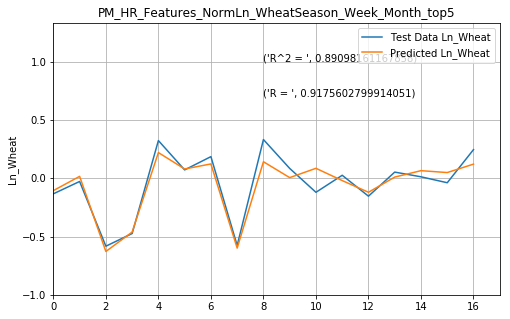

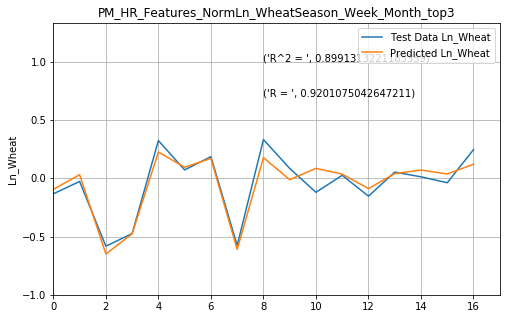

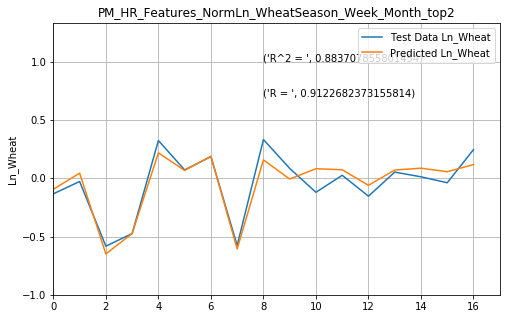

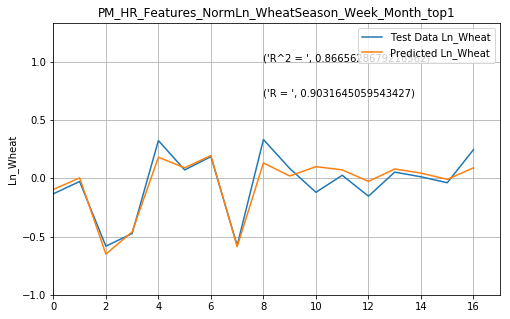

In [73]:
#This model designated to work only with Potohar Wheat Features Jhelum Normalized!!!!!!!!!!!!!!!
#run model
for i in target:
    for j in top_features:
        RFR_PM_HR_Norm_model('Wheat_ton_ha', Top_Features[j], Potohar_HR_Features)

/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Week_Month_top5
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.20288127267338799
R2 is: 0.7546771471278956
NS is 0.7546771471278957
Correlation is 0.8549025167119648
MAPE is 13.765407020800808


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Week_Month_top3
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.19097779839196774
R2 is: 0.7826198669149625
NS is 0.7826198669149625
Correlation is 0.865160250996727
MAPE is 12.321921021252269


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Week_Month_top2
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.20257616097896927
R2 is: 0.7554144708491927
NS is 0.7554144708491928
Correlation is 0.8535790040096404
MAPE is 13.297186806343309


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Week_Month_top1
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.2593896501293011
R2 is: 0.5989861501536462
NS is 0.5989861501536462
Correlation is 0.7844666589954647
MAPE is 19.072279010484493


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
March_SMtop5
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.38465374093063914
R2 is: 0.11815144743585304
NS is 0.11815144743585304
Correlation is 0.4599491188728925
MAPE is 29.510048091691676


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Feb_Apr_Meanweekly_C
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.28865533430830115
R2 is: 0.50339251551788
NS is 0.5033925155178799
Correlation is 0.7538127404188205
MAPE is 22.51778078220188


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Meanweekly_C
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.2781604276703792
R2 is: 0.5388472782575622
NS is 0.5388472782575623
Correlation is 0.7765115199522378
MAPE is 20.91126269590402


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Nov_Mar_Minweekly_C
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=25,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.2894722549545132
R2 is: 0.500577649988234
NS is 0.5005776499882342
Correlation is 0.7268988206904289
MAPE is 22.430794289697552


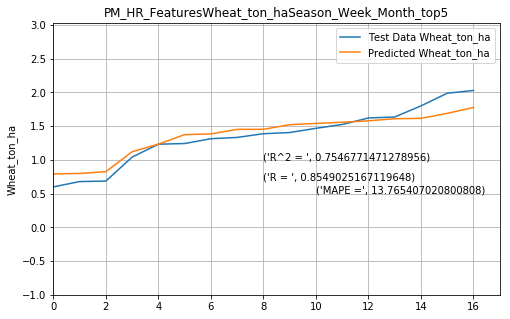

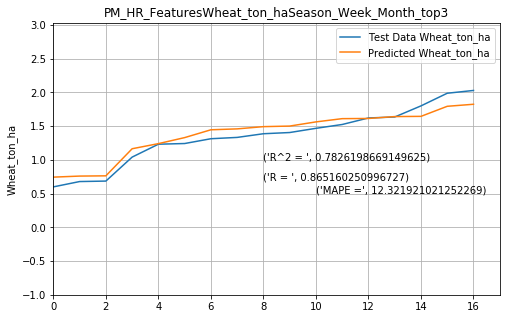

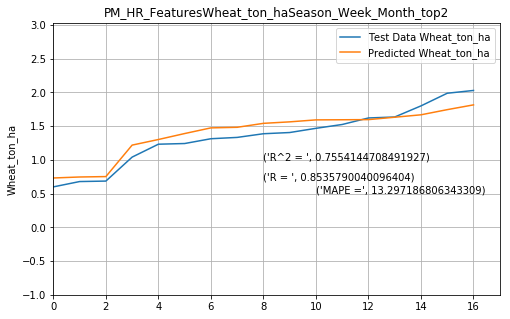

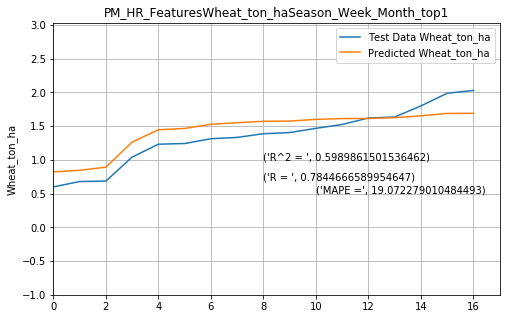

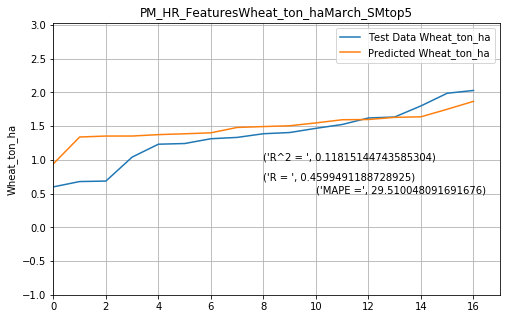

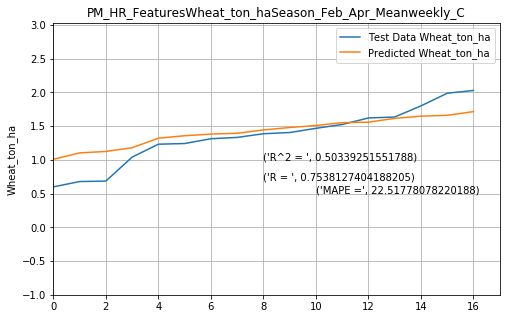

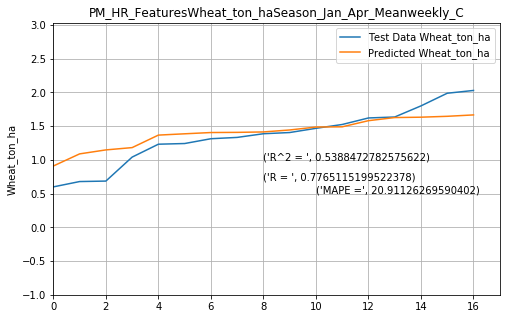

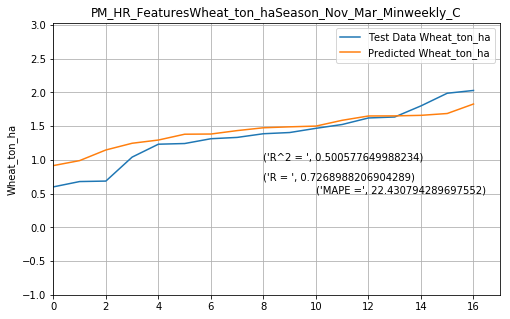

In [10]:

#run model
for j in top_features:
    RFR_PM_HR_Norm_model('Wheat_ton_ha', Top_Features[j], Potohar_HR_Features)